In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
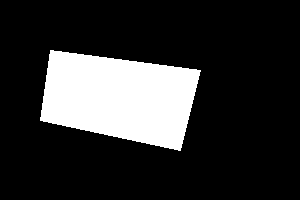

In [2]:
# --- Crear una imagen simple con un objeto ---
imagen = np.zeros((200, 300), dtype=np.uint8)
# Dibujar una forma blanca (ej., un polígono)
puntos = np.array([[50, 50], [200, 70], [180, 150], [40, 120]], np.int32)
puntos = puntos.reshape((-1, 1, 2))
cv2.fillPoly(imagen, [puntos], 255) # Rellenar el polígono con blanco

In [3]:
# --- Simular segmentación (ya hecha en este caso simple) ---
# En un escenario real, esto sería el resultado de umbralización, detección de bordes, etc.
# Asumimos que el objeto es blanco (255) y el fondo es negro (0)
imagen_segmentada = imagen

In [4]:
# --- Encontrar Contornos ---
# cv2.RETR_EXTERNAL encuentra solo los contornos exteriores
# cv2.CHAIN_APPROX_SIMPLE comprime segmentos, dejando solo sus puntos finales.
contornos, jerarquia = cv2.findContours(imagen_segmentada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [5]:
# --- Procesar el/los contorno(s) encontrado(s) ---
# Crear una imagen a color para dibujar los resultados
imagen_color = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)


--- Celda 2: Selección de Contorno y Cálculo de Momentos ---
Contorno más grande seleccionado.
Momentos Geométricos calculados:
  m00 (área aprox.): 11235.00
  m10: 1340730.00
  m01: 1094905.83

--- Celda 3: Cálculo del Centroide ---
Centroide calculado: (119, 97)

--- Celda 4: Cálculo del Área ---
Área calculada (cv2.contourArea): 11235.00 píxeles cuadrados

--- Celda 5: Cálculo del Perímetro ---
Perímetro calculado (cv2.arcLength): 473.14 píxeles

--- Celda 6: Dibujando Contorno y Centroide ---
Contorno dibujado en verde.
Centroide dibujado en rojo.

--- Celda 7: Mostrando Imagen Final ---


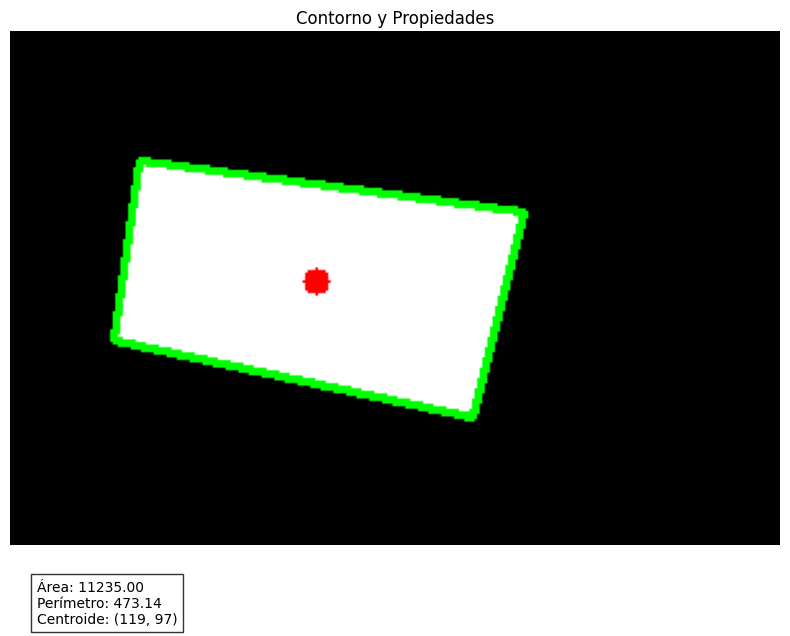

Imagen final mostrada.

--- Resumen Final de Propiedades ---
  - Área: 11235.00 píxeles cuadrados
  - Perímetro: 473.14 píxeles
  - Centroide: (119, 97)


In [12]:
print("\n--- Celda 2: Selección de Contorno y Cálculo de Momentos ---")
if contornos:
    # Seleccionar el contorno más grande
    contorno_actual = max(contornos, key=cv2.contourArea)
    print("Contorno más grande seleccionado.")

    # Calcular Momentos Geométricos
    momentos = cv2.moments(contorno_actual)
    print("Momentos Geométricos calculados:")
    # Imprimir algunos momentos clave para ilustrar
    print(f"  m00 (área aprox.): {momentos['m00']:.2f}")
    print(f"  m10: {momentos['m10']:.2f}")
    print(f"  m01: {momentos['m01']:.2f}")

    # --- Celda 3: Calcular Centroide ---
    print("\n--- Celda 3: Cálculo del Centroide ---")
    centroide_x = centroide_y = -1 # Valores por defecto
    if momentos["m00"] != 0:
        centroide_x = int(momentos["m10"] / momentos["m00"])
        centroide_y = int(momentos["m01"] / momentos["m00"])
        print(f"Centroide calculado: ({centroide_x}, {centroide_y})")
    else:
        print("Advertencia: El área del contorno (m00) es cero, no se puede calcular el centroide.")

    # --- Celda 4: Calcular Área ---
    print("\n--- Celda 4: Cálculo del Área ---")
    area = cv2.contourArea(contorno_actual)
    print(f"Área calculada (cv2.contourArea): {area:.2f} píxeles cuadrados")

    # --- Celda 5: Calcular Perímetro ---
    print("\n--- Celda 5: Cálculo del Perímetro ---")
    perimetro = cv2.arcLength(contorno_actual, True) # True indica contorno cerrado
    print(f"Perímetro calculado (cv2.arcLength): {perimetro:.2f} píxeles")

    # --- Celda 6: Dibujar Resultados en la Imagen ---
    print("\n--- Celda 6: Dibujando Contorno y Centroide ---")
    # Dibujar el contorno mismo (línea verde)
    cv2.drawContours(imagen_color, [contorno_actual], -1, (0, 255, 0), 2)
    print("Contorno dibujado en verde.")

    # Dibujar el centroide (círculo rojo)
    if centroide_x != -1 and centroide_y != -1:
      cv2.circle(imagen_color, (centroide_x, centroide_y), 5, (0, 0, 255), -1)
      print("Centroide dibujado en rojo.")
    else:
      print("Centroide no dibujado (no calculado).")

    # --- Celda 7: Mostrar Imagen Final con Información ---
    print("\n--- Celda 7: Mostrando Imagen Final ---")
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)) # Convertir BGR a RGB
    plt.title('Contorno y Propiedades')
    plt.axis('off')

    # Añadir información de texto
    texto_info = f"Área: {area:.2f}\nPerímetro: {perimetro:.2f}\nCentroide: ({centroide_x}, {centroide_y})"
    plt.text(10, imagen.shape[0] + 30, texto_info, color='black', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()
    print("Imagen final mostrada.")

    # --- Resumen Final (Opcional, podría estar en Celda 7) ---
    print("\n--- Resumen Final de Propiedades ---")
    print(f"  - Área: {area:.2f} píxeles cuadrados")
    print(f"  - Perímetro: {perimetro:.2f} píxeles")
    if centroide_x != -1 and centroide_y != -1:
      print(f"  - Centroide: ({centroide_x}, {centroide_y})")

# --- Celda (Alternativa): Manejo si no hay contornos ---
elif not contornos: # Se ejecuta si la lista 'contornos' está vacía
    print("\n--- No se encontraron contornos ---")
    plt.imshow(imagen, cmap='gray')
    plt.title('Imagen Original (sin contornos)')
    plt.axis('off')
    plt.show()
    print("Mostrando imagen original.")
